[Link to this document's Jupyter Notebook](./0415-PROJECT_Part2.ipynb)

# Project Part 2: Benchmark and Optimization

In this milestone you will provide a report which includes the results of your benchmark and optimization.  Your report will include a benchmark speeds on a single core and then a description of what you did to speed up the code and a graph of how much improvements you made over the benchmark.  Your final report should include the following:

- Project Title
- Motivating Image
- Abstract
- Methodology
- Timing Results
- Concluding Discussion and Future Work
- References


To help you out your instructor has provided the following template


---- START TEMPLATE ----

# Part 2 - Sample Lasso

By Filip Jevtic

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

<img src="https://humantechnopole.it/wp-content/uploads/2020/08/shutterstock_314077820-1024x768.jpg" alt="Just a simple camera icon intended to be replaced with your image" width="50%">

Image from: https://humantechnopole.it/wp-content/uploads/2020/08/shutterstock_314077820-1024x768.jpg

---
# Abstract


This project is based in the domain of computational biology. It uses a customized lasso regression called Sample LASSO to impute gene expression profiles for microarray samples. The lasso algorithm is a regression analysis method that minimizes the sum of squared errors, performing both variable selection and regularization, which increases interpretability of a model.This is important for purposes in the medical field such as identifing diseases based on the gene expression profile. I picked this domain because it is one I am already familiar with, which meant that conceptually understanding the code was easier. Additionally, I picked this domain as opposed to something else because this program can make a real impact in the world. Computational science is used in biology to gain a greater understanding of the numbers and data that govern microbiology, while also providing computational methods to classify or impute data in it. What I did in this project is benchmark and test 2 different kinds of parallelization/optimization. I created benchmarks and concluded that I was able to speed the code up by about 30-40%.

---
# Methodology


The project is made up of 3 python scripts, 3 sbatch submission scripts. Each different parallelization method uses a separate version of all three. In total there are 3 sets of 3 python scripts/sbatch submission scripts. The methods/options implemented go as follows:
    1. Job array implementation for knitting and evaluation scripts, nodes = 1
    2. Job array implementation for knitting and evaluation scripts, nodes = # arrays
    3. Numba implementation with @jit
    4. Numba implementation with @jit(nopython=True)
    5. Numba implementation with @jit(nopython=True,parallel=True)
    6. Numba implementation with @njit(fastmath=True)
    7. Numba & Job array (nodes = 1, @jit)
    8. Standard serial implementation
    
The project is initially run on private, unaccessible research data, that is too big in size to push to Github. Therefore, I found worm data to use as a example when reproducing this code. What I already did is set the data used to the worm data, so you don't have to worry about changing anything. If you navigate to the main part of the repo, the entire script is run in one command. You need to change the beginning of the file name depending on your method. If you want to run in serial (original code), simply type 

```
    sbatch <insert>LASSO2_v2_trimmed_LINCS.sb
```
Notice the insert. If you want to run the original code, don't insert anything. If you want to run it with job arrays type in "jb_". (uses numba currently too. If you want to remove that, then crtl-f search through the 3 python files and comment out any @jit/njit used in the code.) If you want to run with numba only, type in "numba_". 

The first job submitting will submit many jobs that make all these models. After all the models are done, the knitting script will be submitted, which combines all the model data together into one array. Then, the evaluation script is called, which outputs a script of a metric for each test/val model created, allowing someone to graph it easily.

---
# Timing Results

&#9989;  Show the results of a baseline experiment on a single core and after optimization.  Also include a graph of the results. 


&#9989;  Provide the results of a benchmark or scaling study for your project.  Make sure you include a description of the hardware that was used and graph the results.  Make sure you include detailed descriptions about the hardware that was used.  Graphs alone are not sufficient, explain the graphs. Did they meet expectations?  Was there any anomalies?

In [11]:
import matplotlib.pyplot as plt

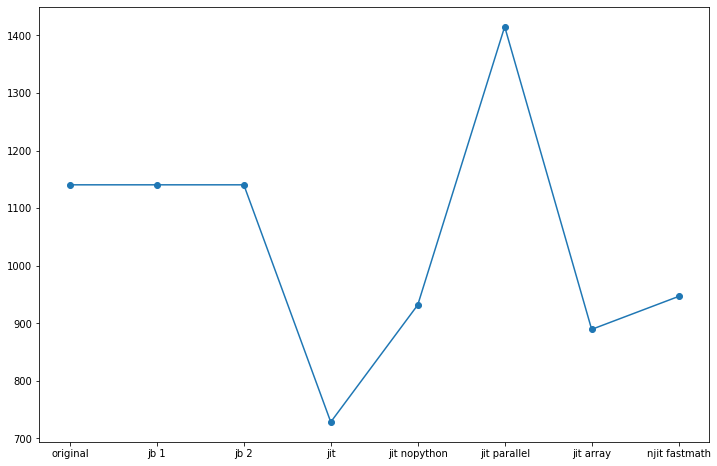

In [22]:
lasso = [1140.42,1140.42,1140.42,728.56,931.8,1414.97,889.422,946.63]
methods = ["original","jb 1","jb 2","jit","jit nopython","jit parallel","jit array","njit fastmath"]
knitting = [94.31,28.01,57.91,70.34,66.16,71.24,44.20,107.05]
eval = [71.44,58.62,54.327,87.65,99.68,93.9,52.3,187.97]
fig = plt.figure(figsize=(12,8))
plt.plot(methods,lasso)
plt.scatter(methods,lasso)


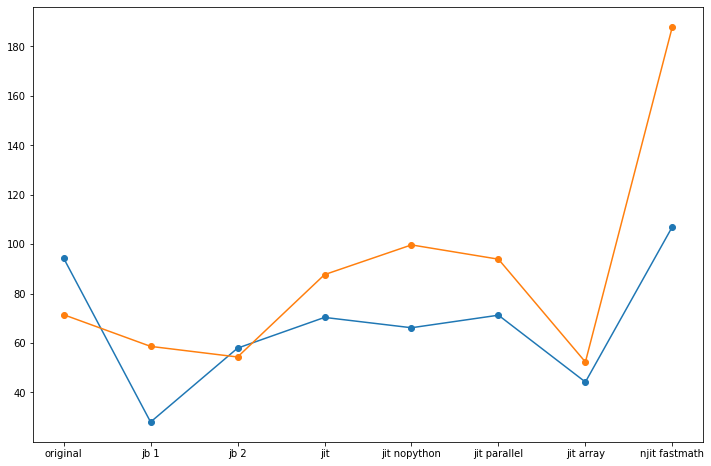

In [24]:
fig = plt.figure(figsize=(12,8))
plt.plot(methods,knitting)
plt.plot(methods,eval)

plt.scatter(methods,knitting)
plt.scatter(methods,eval)


In [ ]:
benchmark lasso (longest job): 19:19
knitting + eval = 1:34 + 1:11

knitting + eval = 0:28 + 0:58 #job array 1 node
knitting + eval = 0:57 + 0:54 # job array 2 nodes
 12:08 + 1:10 + 1:27 #jit
15:31 + 1:06 + 1:39 # jit no python
23:34 + 1:11 + 1:33 # jit parallel
14:49 + :44 + :52# jit array
15:46 + 1:47 + 3:07 #fastmath

---
# Concluding Discussion and Future Work

&#9989;  Give another short description of the project and your final results.  Use this to talk about what you learned in this project.  Include what you found interesting and what would be a next step.  

---
# References

&#9989;  Include links to websites and resources used in this project.  

---- END TEMPLATE ----

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----